Работа Чулкова Данила, студента 775 группы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [56]:
import warnings
warnings.filterwarnings('ignore')

__Навигация по проекту__

1) [Введение](#1)

2) [Явный метод Рунге-Кутты первого порядка](#2)

3) [Явный метод Рунге-Кутты четвертого порядка](#3)

4) [Неявный метод Рунге-Кутты. Провал](#4)

5) [Попытка все исправить. Успех!](#5)

6) [Заключение](#6)

## <a id=1>Введение</a>

Имеем три задачи, каждая из которых - система ОДУ, описывающая изменение изменение численности популяций двух видов и эволюцию некоего генетического признака $\alpha$. 

__Первая__

$
\begin{equation*}
 \begin{cases}
   \overset{.}{x}=x(1-0.5x-\frac{2}{7\alpha^2}y)\\
   \overset{.}{y}=y(2\alpha-3.5\alpha^2x-0.5y)\\
   \overset{.}{\alpha}=\varepsilon(2-7\alpha x)
 \end{cases}
\end{equation*}
$

где $0< \varepsilon\leq 10^{-2}, 0\leq x_0\leq 3, 0\leq y_0 \leq 15, \alpha_0=0.$

__Вторая__

$
\begin{equation*}
 \begin{cases}
   \overset{.}{x}=x(2\alpha_1-0.5x-\alpha_1^2\alpha_2^{-2}y)\\
   \overset{.}{y}=y(2\alpha_2-\alpha_1^{-2}\alpha_2^{-2}x-0.5y)\\
   \overset{.}{\alpha_1}=\varepsilon(2-2\alpha_1\alpha_2^{-2}y)\\
   \overset{.}{\alpha_2}=\varepsilon(2-2\alpha_2\alpha_1^{-2}x)
 \end{cases}
\end{equation*}
$

где $0< \varepsilon\leq 10^{-2}, 0\leq x_0\leq 40, 0\leq y_0 \leq 40, \alpha_{10}=0, \alpha_{20}=10.$

__Третья__

$
\begin{equation*}
 \begin{cases}
   \overset{.}{x}=x(2\alpha_1-0.5x-\alpha_1^3\alpha_2^{-3}y)\\
   \overset{.}{y}=y(2\alpha_2-\alpha_1^{-3}\alpha_2^{3}x-0.5y)\\
   \overset{.}{\alpha_1}=\varepsilon(2-3\alpha_1^2\alpha_2^{-3}y)\\
   \overset{.}{\alpha_2}=\varepsilon(2-3\alpha_2^2\alpha_1^{-3}x)
 \end{cases}
\end{equation*}
$

где $0< \varepsilon\leq 10^{-3}, 0\leq x_0\leq 40, 0\leq y_0 \leq 40, \alpha_{10}=0, \alpha_{20}=10.$

$0\leq t \leq 2000$

Определим функции, возвращающую вектор значений $\overline{f}$ для каждой из правых частей трех систем выше.

In [45]:
def first_odu_function(t, values, eps=1e-3):
    """
    Returns the vector of values for the first system.
    
    Parameters:
    x, y, aplha
    eps - the system parameter (by default 1e-3)
    
    """
    x = values[0]
    y = values[1]
    alpha = values[2]
    return np.array([x*(1-0.5*x-2*y/(7*alpha**2)),
                     y*(2*alpha-3.5*alpha**2*x-0.5*y),
                     eps*(2-7*alpha*x)])

In [53]:
def second_odu_function(t, values, eps=1e-3):
    """
    Returns the vector of values for the second system.
    
    Parameters:
    x, y, aplha1, alpha2
    eps - the system parameter (by default 1e-3)
    
    """
    x = values[0]
    y = values[1]
    alpha1 = values[2]
    alpha2 = values[3]
    return np.array([x*(2*alpha1-0.5*x-alpha1**2*alpha2**(-2)*y),
                     y*(2*alpha2-alpha1**(-2)*alpha2**(-2)*x-0.5*y),
                     eps*(2-2*alpha1*alpha2**(-2)*y),
                     eps*(2-2*alpha2*alpha1**(-2)*x)])

In [54]:
def third_odu_function(t, values, eps=1e-4):
    """
    Returns the vector of values for the third system.
    
    Parameters:
    x, y, aplha1, alpha2
    eps - the system parameter (by default 1e-4)
    
    """
    x = values[0]
    y = values[1]
    alpha1 = values[2]
    alpha2 = values[3]
    return np.array([x*(2*alpha1-0.5*x-alpha1**3*alpha2**(-3)*y),
                     y*(2*alpha2-alpha1**(-3)*alpha2**(-3)*x-0.5*y),
                     eps*(2-3*alpha1**2*alpha2**(-3)*y),
                     eps*(2-3*alpha2**2*alpha1**(-3)*x)])

Для численного решения этих систем воспользуемся явными мтодами Рунге-Кутты 1-го и 4-го порядков точности, а также неявным методом Рунге-Кутты (Хаммера-Холлинсворта)

## <a id=2> Явный метод Рунге-Кутты первого порядка </a>

Начнем с решения систем ОДУ явными методами Рунге-Кутты. Эти методы являются отношаговыми - для построения решения на данном шаге необходимо знать лишь искомые значения на предыдущем. Метод, рассматриваемый в этом разделе, - самый простой и имеет первый порядок точности.

__Схема метода__

Чтобы решить систему ОДУ вида:
$$\overset{.}{\overline{z}}=\overline{f}(t,\overline{z})$$
На каждом шаге сетки i (с размером шага h) мы находим очередное значение целового вектора функций (в случае системы) по следующей формуле:

$$ \overline{z}_{i+1} = \overline{z}_{i} + h\overline{f}(t_i,\overline{z}_i)$$

Реализация метода согласно приведенному выше описанию:

In [48]:
def Runge_Kutta_1(fun, z0, eps=1e-3, T=2000, h=0.05, error_info=False):
    """
    First-order Runge-Kutta method.
    
    Parametres:
    fun: function, that corresponds the ODU system
    z0 - initial values
    eps - the system parameter (by default 1e-3)
    T - the time bound (2000 by default)
    h - the step size (0.05 by default)
    error_info - bool (False by default), whether show info of method errors or not
    
    Returns:
    History of method working.
    
    """
    N = int(T/h) # steps
    columns=['Time', 'X', 'Y']+['Alpha'+str(i+1) for i in range(len(z0)-2)]
    history = pd.DataFrame([np.append([0],z0)], columns=columns)
    
    for i in range(1,N+1):
        try:
            t = history.iloc[i-1]['Time']
            t_new = t + h
            f_new = history.iloc[i-1]['X':] + h*fun(t=t, values=history.iloc[i-1]['X':])
            history.loc[i,'Time'] = t_new
            history.loc[i]['X':] = f_new
        except ArithmeticError:
            if error_info:
                print('Метод разошелся после {} шагов!('.format(i))
            return history
        if history.iloc[i-1].isna().any():
            if error_info:
                print('Метод разошелся после {} шагов!('.format(i))
            return history
    return history

Величину шага берем 0.05 (поменьше - лучше).

Перейдем к анализу работы метода. Сначала попробуем решить с его помощью первую систему ОДУ. Начальные значения $\alpha$ попробуем взять 0.001 вместо положенного 0, ведь иначе мы столкнемся с делением на 0. Начальные значения x0 и y0 будем задавать всеми возможными комбинациями ограничений из условий, то есть множеством пар $(x_0,y_0): x_0 \in [0,2], y_o \in [0,2,...,14]$. Таким образом получим $1*2*8=16$ попытки работы метода.

In [7]:
first_x_grid = np.arange(0,2)
first_y_grid = np.arange(0,16,2)

Зададим словари, где будем хранить всю историю и результаты работ каждого из методов, которые мы попробуем для каждой из систем.

In [8]:
History = {}
Results = {}
History['first'] = {}
Results['first'] = {}
History['fourth'] = {}
Results['fourth'] = {}
History['implicit'] = {}
Results['implicit'] = {}

Для того чтобы в дальнейшем проще тестить на различных начальных значениях методы определим вспомогательную функцию.

In [9]:
def testing_method(method, fun, xs, ys, alphas1, alphas2=None, **kwargs):
    """
    Tests the method on the set of parameters.
    
    Parameters:
    method - function
    fun - function (that method needs to)
    xs - set of initial values x_0
    ys - set of initial values y_0
    alphas1 - set of initial alpha1 values
    alphas2 - set of initial alpha2 values (if required)
    **args - extra arguments if needed
    
    Returns: the history of tests and resulting table.
    
    """
    x_, y_ = np.meshgrid(xs, ys)
    i=0
    History_ = []
    if alphas2 is None:
        columns = ['x0', 'y0','alpha1_0','alpha1_final','Сошелся', 'Число успешных шагов']
    else:
        columns = ['x0', 'y0','alpha1_0', 'alpha2_0','alpha1_final', 'alpha2_final','Сошелся', 'Число успешных шагов']
    Results_ = pd.DataFrame([], columns=columns)
    
    if alphas2 is None:
        for alpha in alphas1 if type(alphas1) is list else [alphas1]:
            for initial in np.dstack([x_.ravel(),y_.ravel()])[0]:
                history = method(fun, z0=np.append(initial,[alpha]), **kwargs)
                History_.append(history)
                Results_.loc[i,'x0':'y0'] = initial
                Results_.loc[i, 'alpha1_0':] = [alpha, history.loc[len(history)-1,'Alpha1'], len(history)-1==40000 and (np.all(np.abs(history.loc[len(history)-1])<1e50)) , len(history)-1]
                i+=1
    else:
        a1_, a2_ = np.meshgrid(alphas1, alphas2)
        for alphas in np.dstack([a1_.ravel(), a2_.ravel()])[0]:
            for initial in np.dstack([x_.ravel(),y_.ravel()])[0]:
                history = method(fun, z0=np.append(initial,alphas), **kwargs)
                History_.append(history)
                Results_.loc[i,'x0':'y0'] = initial
                Results_.loc[i, 'alpha1_0':'alpha2_0'] = alphas
                Results_.loc[i, 'alpha1_final'] = history.loc[len(history)-1,'Alpha1']
                Results_.loc[i, 'alpha2_final'] = history.loc[len(history)-1,'Alpha2']
                Results_.loc[i, 'Сошелся':] = [len(history)-1==40000 and (np.all(np.abs(history.loc[len(history)-1])<1e50)) , len(history)-1]
                i+=1
    return [History_, Results_]

Врубаем на __первой системе__ ОДУ

In [10]:
%%time
History['first'][1], Results['first'][1] = testing_method(Runge_Kutta_1, first_odu_function,
                                                          first_x_grid, first_y_grid, alphas1=0.001)

CPU times: user 12min 6s, sys: 3.74 s, total: 12min 10s
Wall time: 12min 11s


In [11]:
print('Из {} попыток в итоге сошлись {}'.format(len(Results['first'][1]), np.count_nonzero(Results['first'][1]['Сошелся'])))

Из 16 попыток в итоге сошлись 9


Возможно, при меньшем шаге h сошлось бы больше, но тут и так ждать 10 мин, куда еще...

In [12]:
Results['first'][1]

,x0,y0,alpha1_0,alpha1_final,Сошелся,Число успешных шагов
0,0,0,0.001,4.001,True,40000
1,1,0,0.001,0.142857,True,40000
2,0,2,0.001,4.001,True,40000
3,1,2,0.001,-5.46327e+211,False,7
4,0,4,0.001,4.001,True,40000
5,1,4,0.001,-8.48183e+229,False,7
6,0,6,0.001,4.001,True,40000
7,1,6,0.001,-1.65146e+240,False,7
8,0,8,0.001,4.001,True,40000
9,1,8,0.001,-1.73027e+247,False,7


Таким образом, все тесты разбились на три группы:

1) Метод "разошелся"

2) Метод сошелся и $\alpha_{final} \approx 0.14$ (при этом $x_0 \neq 0, y_0 = 0$)

3) Метод сошелся $\alpha_{final} \approx 4$ (при этом $x_0 = 0$)


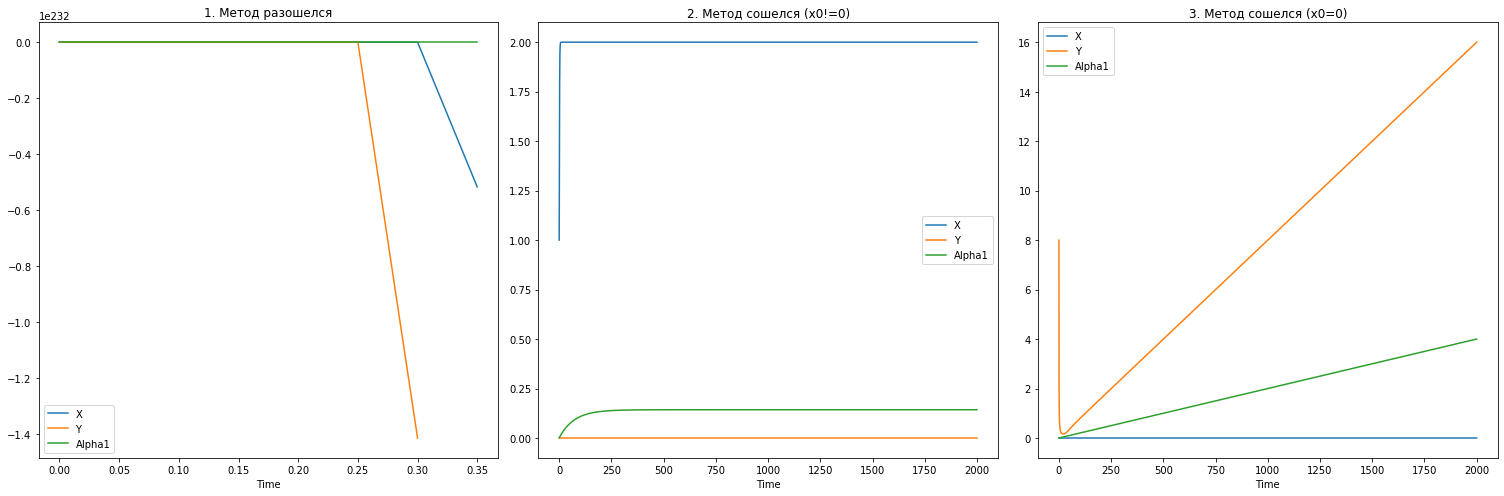

In [160]:
fig, ax = plt.subplots(1,3, figsize=(21,7), squeeze=False)
History['first'][1][3].plot(ax=ax[0][0], x='Time', title='1. Метод разошелся')
History['first'][1][1].plot(ax=ax[0][1], x='Time', title='2. Метод сошелся (x0!=0)')
History['first'][1][8].plot(ax=ax[0][2], x='Time', title='3. Метод сошелся (x0=0)')

fig.tight_layout()

Во втором случае поведение Alpha1 похоже на логарифм. В третьем случае Alpha1(t) и Y(t) растут практически линейно.

Перейдем к решению последних __второй системы__ ОДУ тем же методом. Зададим сетку начальных значений:

In [61]:
second_x_grid = np.arange(0,41,10)
second_y_grid = np.arange(0,41,10)

Запускаем тесты:

In [162]:
%%time
History['first'][2], Results['first'][2] = testing_method(Runge_Kutta_1, second_odu_function,
                                                          second_x_grid, second_y_grid, alphas1=0.001, alphas2=10)

CPU times: user 13min 6s, sys: 5.18 s, total: 13min 11s
Wall time: 13min 12s


In [163]:
Results['first'][2][Results['first'][2]['Сошелся']]

,x0,y0,alpha1_0,alpha2_0,alpha1_final,alpha2_final,Сошелся,Число успешных шагов
0,0,0,0.001,10,4.001,14,True,40000
1,10,0,0.001,10,4.001,4.72343e+17,True,40000
2,20,0,0.001,10,4.001,4.18201e+19,True,40000
3,30,0,0.001,10,4.001,1.42618e+18,True,40000
4,40,0,0.001,10,4.001,0.800047,True,40000
5,0,10,0.001,10,2.27967,14,True,40000
10,0,20,0.001,10,2.27967,14,True,40000
15,0,30,0.001,10,2.27967,14,True,40000
20,0,40,0.001,10,2.27967,14,True,40000


In [29]:
print('Из {} попыток в итоге сошлись {}'.format(len(Results['first'][2]), np.count_nonzero(Results['first'][2]['Сошелся'])))

Из 25 попыток в итоге сошлись 9


Причем сошлись лишь те, где одно из начальных значений 0. У нас снова три группы тестов:

1) Метод "разошелся"

2) Метод сошелся и $\alpha_{1,final} \approx 4$, причем $y_0=0$ (однако, $\alpha_{2,final}$ - разные)

3) Метод сошелся и $\alpha_{1,final} \approx 2.4$,причем $x_0=0, y_0 \neq 0$

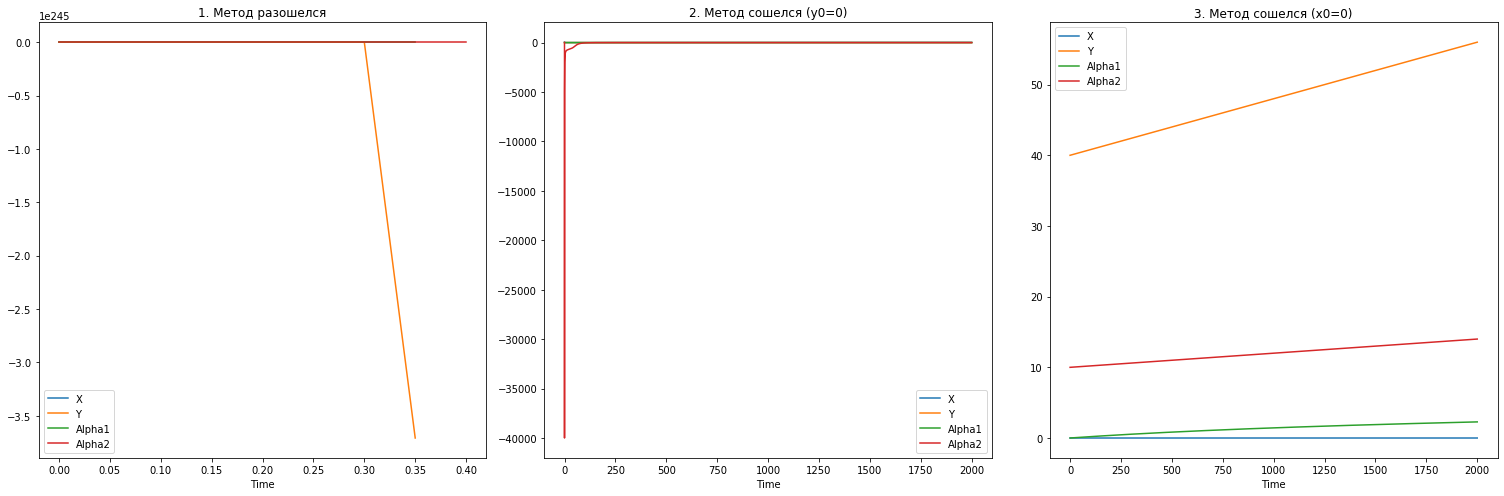

In [164]:
fig, ax = plt.subplots(1,3, figsize=(21,7), squeeze=False)
History['first'][2][17].plot(ax=ax[0][0], x='Time', title='1. Метод разошелся')
History['first'][2][4].plot(ax=ax[0][1], x='Time', title='2. Метод сошелся (y0=0)')
History['first'][2][20].plot(ax=ax[0][2], x='Time', title='3. Метод сошелся (x0=0)')

fig.tight_layout()

Во втором случае нас сначало поколбасило, потом метод "успокоился". В третьем случае просходило что-то похожее на правду.

Сетку для __третьей системы__ ОДУ берем ту же.

In [51]:
third_x_grid = np.arange(0,41,10)
third_y_grid = np.arange(0,41,10)

In [57]:
%%time
History['first'][3], Results['first'][3] = testing_method(Runge_Kutta_1, third_odu_function,
                                                          third_x_grid, third_y_grid, alphas1=0.001, alphas2=10)

CPU times: user 6min 55s, sys: 2.69 s, total: 6min 58s
Wall time: 6min 58s


In [58]:
Results['first'][3][Results['first'][3]['Сошелся']]

,x0,y0,alpha1_0,alpha2_0,alpha1_final,alpha2_final,Сошелся,Число успешных шагов
0,0,0,0.001,10,0.401,10.4,True,40000
5,0,10,0.001,10,0.399789,10.4,True,40000
10,0,20,0.001,10,0.399789,10.4,True,40000
15,0,30,0.001,10,0.399789,10.4,True,40000
20,0,40,0.001,10,0.399789,10.4,True,40000


In [38]:
print('Из {} попыток в итоге сошлись {}'.format(len(Results['first'][3]), np.count_nonzero(Results['first'][3]['Сошелся'])))

Из 25 попыток в итоге сошлись 5


У нас снова три группы тестов:

1) Метод "разошелся"

2) Метод сошелся и $\alpha_{1,final} \approx 0.401$, $\alpha_{2,final} \approx 10.4$, причем $x_0=0, y_0=0$

3) Метод сошелся и $\alpha_{1,final} \approx 0.399$, $\alpha_{2,final} \approx 10.4$, причем $x_0=0, y_0 \neq 0$

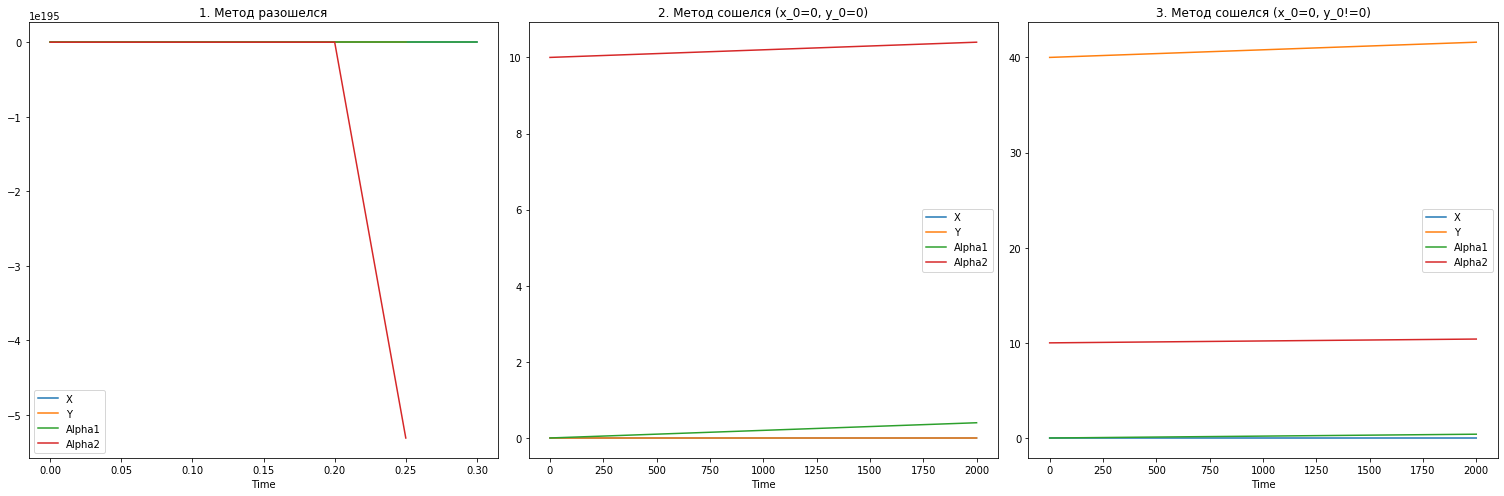

In [166]:
fig, ax = plt.subplots(1,3, figsize=(21,7), squeeze=False)
History['first'][3][17].plot(ax=ax[0][0], x='Time', title='1. Метод разошелся')
History['first'][3][0].plot(ax=ax[0][1], x='Time', title='2. Метод сошелся (x_0=0, y_0=0)')
History['first'][3][20].plot(ax=ax[0][2], x='Time', title='3. Метод сошелся (x_0=0, y_0!=0)')

fig.tight_layout()

__Вывод относительно метода__: метод Рунге-Кутты первого порядка, по-видимому, не очень хорош для решения этой задачи. Ну чтож, попробуем другой.


## <a id=3> Явный метод Рунге-Кутты четвертого порядка </a>

__Схема метода__

Чтобы решить систему ОДУ вида:
$$\overset{.}{\overline{z}}=\overline{f}(t,\overline{z})$$
На каждом шаге сетки i (с размером шага h) мы находим очередное значение целового вектора функций (в случае системы) следующим образом:

1) Сначала вычисляем промежуточные вспомогательные значения $k_1, k_2, k_3, k_4$:

$\overline{k}_1 = \overline{f}(t_i, \overline{z}_i)$

$\overline{k}_2 = \overline{f}(t_i+\frac{h}{2}, \overline{z}_i+\frac{h}{2}\overline{k}_1)$

$\overline{k}_3 = \overline{f}(t_i+\frac{h}{2}, \overline{z}_i+\frac{h}{2}\overline{k}_2)$

$\overline{k}_4 = \overline{f}(t_i+h, \overline{z}_i+h\overline{k}_3)$

2) Затем делаем шаг:

$\overline{z}_{i+1} = \overline{z}_{i} + \frac{h}{6}f(\overline{k}_1+2\overline{k}_3+2\overline{k}_3+\overline{k}_4)$

Реализация метода согласно приведенному выше описанию:

In [65]:
def Runge_Kutta_4(fun, z0, eps=1e-3, T=2000, h=0.05, error_info=False):
    """
    Fourth-order Runge-Kutta method.
    
    Parametres:
    fun: function, that corresponds the ODU system
    z0 - initial values
    eps - the system parameter (by default 1e-3)
    T - the time bound (2000 by default)
    h - the step size (0.05 by default)
    error_info - bool (true by default), whether show info of method errors or not
    
    Returns:
    History of method working.
    
    """
    N = int(T/h) # steps
    columns=['Time', 'X', 'Y']+['Alpha'+str(i+1) for i in range(len(z0)-2)]
    history = pd.DataFrame([np.append([0],z0)], columns=columns)
    
    for i in range(1,N+1):
        try:
            t = history.iloc[i-1]['Time']
            t_new = t + h
            k1 = fun(t=t, values=history.iloc[i-1]['X':])
            k2 = fun(t=t+h/2, values=(history.iloc[i-1]['X':]+h*k1/2))
            k3 = fun(t=t+h/2, values=(history.iloc[i-1]['X':]+h*k2/2))
            k4 = fun(t=t+h, values=(history.iloc[i-1]['X':]+h*k3))
            f_new = history.iloc[i-1]['X':] + h*(k1+2*k2+2*k3+k4)/6
            history.loc[i,'Time'] = t_new
            history.loc[i]['X':] = f_new
        except ArithmeticError:
            if error_info:
                print('Метод разошелся после {} шагов!('.format(i))
            return history
        if history.iloc[i-1].isna().any():
            if error_info:
                print('Метод разошелся после {} шагов!('.format(i))
            return history
    return history

Перейдем к решению систем. Начнем с __первой__. Сетку берем ту же.

In [168]:
%%time
History['fourth'][1], Results['fourth'][1] = testing_method(Runge_Kutta_4, first_odu_function,
                                                          first_x_grid, first_y_grid, alphas1=0.001)

CPU times: user 18min 33s, sys: 4.53 s, total: 18min 38s
Wall time: 18min 39s


In [169]:
Results['fourth'][1][Results['fourth'][1]['Сошелся']]

,x0,y0,alpha1_0,alpha1_final,Сошелся,Число успешных шагов
0,0,0,0.001,4.001,True,40000
1,1,0,0.001,0.142857,True,40000
2,0,2,0.001,4.001,True,40000
4,0,4,0.001,4.001,True,40000
6,0,6,0.001,4.001,True,40000
8,0,8,0.001,4.001,True,40000
10,0,10,0.001,4.001,True,40000
12,0,12,0.001,4.001,True,40000
14,0,14,0.001,4.001,True,40000


In [45]:
print('Из {} попыток в итоге сошлись {}'.format(len(Results['fourth'][1]), np.count_nonzero(Results['fourth'][1]['Сошелся'])))

Из 16 попыток в итоге сошлись 9


Сошлись абсолютно те же случаи, что и в прошлый раз.

И нас снова три группы тестов:

1) Метод "разошелся"

2) Метод сошелся и $\alpha_{1,final} \approx 4$, причем $x_0=0$

3) Метод сошелся и $\alpha_{1,final} \approx 0.14$,причем $x_0 \neq 0, y_0 = 0 $

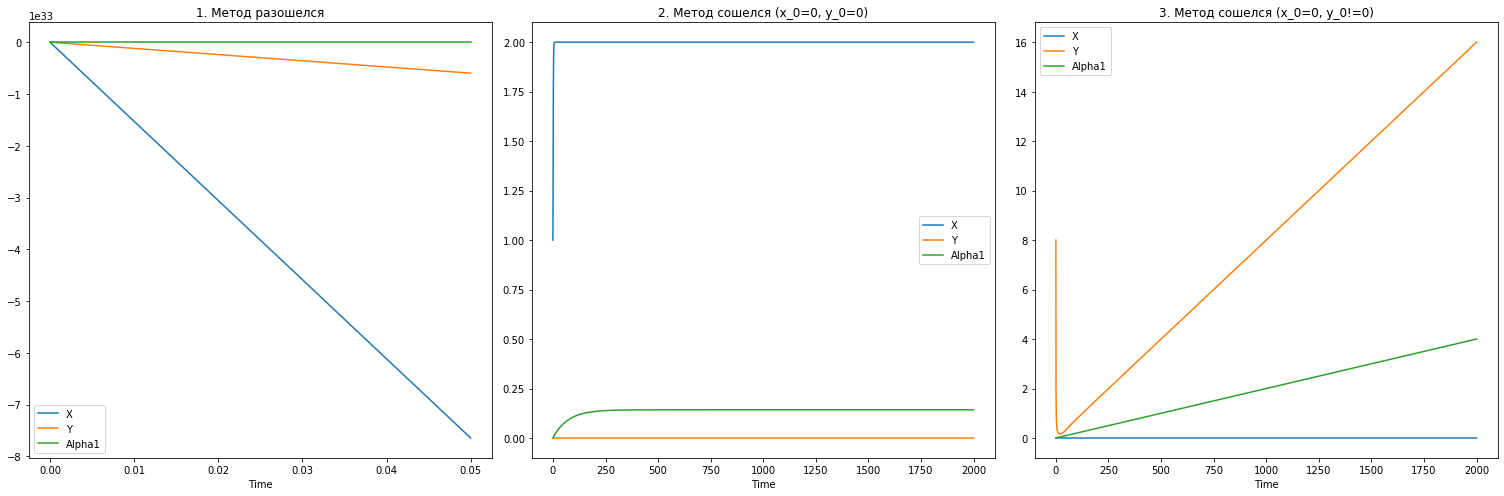

In [170]:
fig, ax = plt.subplots(1,3, figsize=(21,7), squeeze=False)
History['fourth'][1][15].plot(ax=ax[0][0], x='Time', title='1. Метод разошелся')
History['fourth'][1][1].plot(ax=ax[0][1], x='Time', title='2. Метод сошелся (x_0=0, y_0=0)')
History['fourth'][1][8].plot(ax=ax[0][2], x='Time', title='3. Метод сошелся (x_0=0, y_0!=0)')

fig.tight_layout()

Картинки похожи на случай с методом первого порядка.

Теперь __вторая система__:

In [172]:
%%time
History['fourth'][2], Results['fourth'][2] = testing_method(Runge_Kutta_4, second_odu_function,
                                                          second_x_grid, second_y_grid, alphas1=0.001, alphas2=10)

CPU times: user 18min 26s, sys: 4.87 s, total: 18min 31s
Wall time: 18min 32s


In [173]:
Results['fourth'][2][Results['fourth'][2]['Сошелся']]

,x0,y0,alpha1_0,alpha2_0,alpha1_final,alpha2_final,Сошелся,Число успешных шагов
0,0,0,0.001,10,4.001,14,True,40000
5,0,10,0.001,10,2.27965,14,True,40000
10,0,20,0.001,10,2.27965,14,True,40000
15,0,30,0.001,10,2.27965,14,True,40000
20,0,40,0.001,10,2.27965,14,True,40000


In [48]:
print('Из {} попыток в итоге сошлись {}'.format(len(Results['fourth'][2]), np.count_nonzero(Results['fourth'][2]['Сошелся'])))

Из 25 попыток в итоге сошлись 5


В этот раз что-то отличается.

Три группы тестов:

1) Метод "разошелся"

2) Метод сошелся и $\alpha_{1,final} \approx 4$, $\alpha_{2,final} \approx 14$, причем $x_0=0,y_0=0$

3) Метод сошелся и $\alpha_{1,final} \approx 2.27$, $\alpha_{2,final} \approx 14$,причем $x_0 = 0, y_0 \neq 0 $

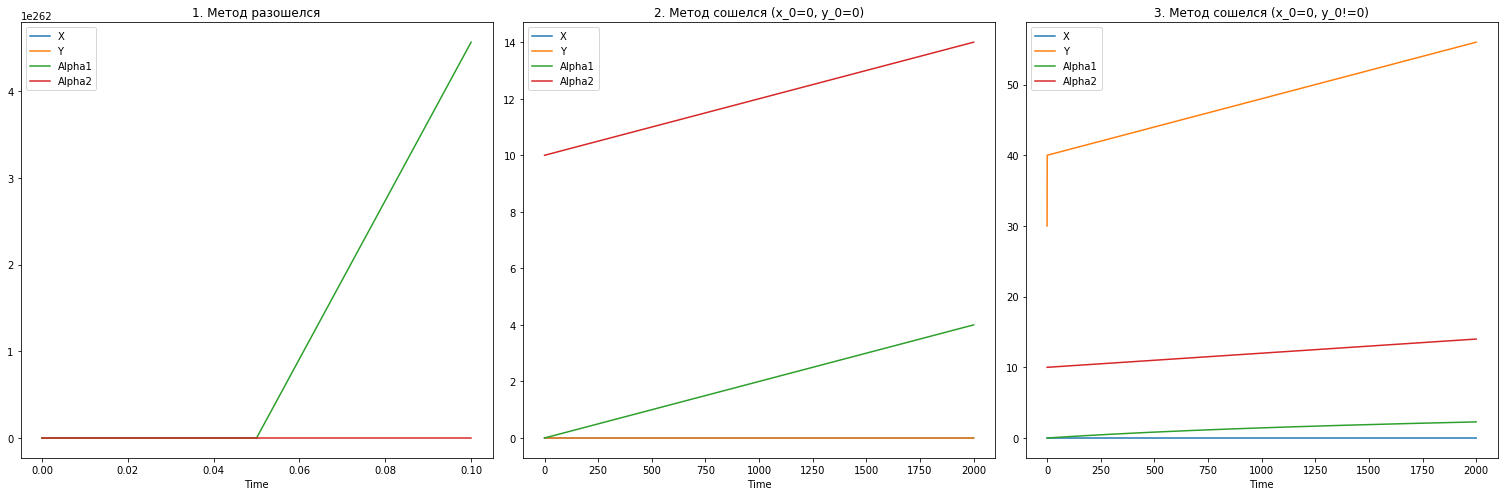

In [174]:
fig, ax = plt.subplots(1,3, figsize=(21,7), squeeze=False)
History['fourth'][2][17].plot(ax=ax[0][0], x='Time', title='1. Метод разошелся')
History['fourth'][2][0].plot(ax=ax[0][1], x='Time', title='2. Метод сошелся (x_0=0, y_0=0)')
History['fourth'][2][15].plot(ax=ax[0][2], x='Time', title='3. Метод сошелся (x_0=0, y_0!=0)')

fig.tight_layout()

И снова похожие с методом 1го порядка резульаты.

Теперь рассматриваем __третью систему__.

In [66]:
%%time
History['fourth'][3], Results['fourth'][3] = testing_method(Runge_Kutta_4, third_odu_function,
                                                          third_x_grid, third_y_grid, alphas1=0.001, alphas2=10)

CPU times: user 10min 3s, sys: 2.53 s, total: 10min 6s
Wall time: 10min 6s


In [67]:
Results['fourth'][3][Results['fourth'][3]['Сошелся']]

,x0,y0,alpha1_0,alpha2_0,alpha1_final,alpha2_final,Сошелся,Число успешных шагов
0,0,0,0.001,10,0.401,10.4,True,40000
5,0,10,0.001,10,0.399789,10.4,True,40000
10,0,20,0.001,10,0.399789,10.4,True,40000
15,0,30,0.001,10,0.399789,10.4,True,40000
20,0,40,0.001,10,0.399789,10.4,True,40000


In [68]:
print('Из {} попыток в итоге сошлись {}'.format(len(Results['fourth'][3]), np.count_nonzero(Results['fourth'][3]['Сошелся'])))

Из 25 попыток в итоге сошлись 5


Сошлись все те же самые, что и в случае с первым методом, да и результаты точно такие же.

Три группы тестов:

1) Метод "разошелся"

2) Метод сошелся и $\alpha_{1,final} \approx 0.401$, $\alpha_{2,final} \approx 10.4$, причем $x_0=0,y_0=0$

3) Метод сошелся и $\alpha_{1,final} \approx 0.399$, $\alpha_{2,final} \approx 10.4$,причем $x_0 = 0, y_0 \neq 0 $

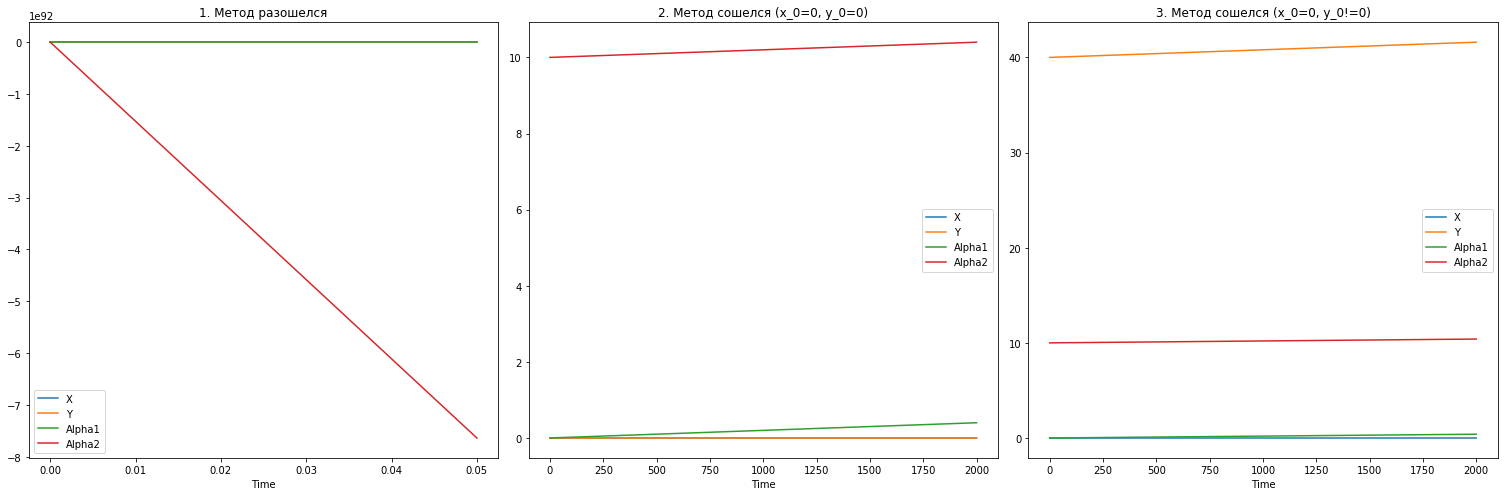

In [175]:
fig, ax = plt.subplots(1,3, figsize=(21,7), squeeze=False)
History['fourth'][3][17].plot(ax=ax[0][0], x='Time', title='1. Метод разошелся')
History['fourth'][3][0].plot(ax=ax[0][1], x='Time', title='2. Метод сошелся (x_0=0, y_0=0)')
History['fourth'][3][20].plot(ax=ax[0][2], x='Time', title='3. Метод сошелся (x_0=0, y_0!=0)')

fig.tight_layout()

Идем дальше!

## <a id=4> Неявный метод Рунге-Кутты. Провал. </a> 

По сути, главное отличие неявных методов от явных в том, что вспомогательная переменная $k_i$ может завситель не только от $k_j, j = \overline{1,i-1}$, но и от последующих $k_j$.

Неустойчивость явных методов Рунге — Кутты создаёт весьма серьёзные проблемы и при численном решении дифференциальных уравнений в частных производных. Неустойчивость явных методов Рунге — Кутты мотивировала развитие неявных методов. Рассмотрим двухэтапный неявный метод четвертого порядка Хаммера-Холлинсворта.

__Схема метода__

1) Вычисляем вспомогательные переменные:

$\overline{k}_{1,i+1} = \overline{f}\Big(t_i+h\Big(\frac{1}{2}-\frac{\sqrt{3}}{6}\Big),\overline{z}_i + \frac{\overline{k}_{1,i}}{4} + \Big(\frac{1}{4}-\frac{\sqrt{3}}{6}\Big)\overline{k}_{2,i}\Big)$

$\overline{k}_{2,i+1} = \overline{f}\Big(t_i+h\Big(\frac{1}{2}+\frac{\sqrt{3}}{6}\Big),\overline{z}_i +  \Big(\frac{1}{4}+\frac{\sqrt{3}}{6}\Big)\overline{k}_{1,i} + \frac{\overline{k}_{2,i}}{4}\Big)$

2) Затем делаем шаг метода:

$\overline{z}_{i+1} = \overline{z}_i + \frac{h}{2}(\overline{k}_{1,i} + \overline{k}_{2,i+1})$

Перейдем к реализации

In [59]:
def Runge_Kutta_implicit(fun, z0, eps=1e-3, T=2000, h=0.05, error_info=False):
    """
    Implicit Runge-Kutta method.
    
    Parametres:
    fun: function, that corresponds the ODU system
    z0 - initial values
    eps - the system parameter (by default 1e-3)
    T - the time bound (2000 by default)
    h - the step size (0.1 by default)
    error_info - bool (true by default), whether show info of method errors or not
    
    Returns:
    History of method working.
    
    """
    N = int(T/h) # steps
    columns=['Time', 'X', 'Y']+['Alpha'+str(i+1) for i in range(len(z0)-2)]
    history = pd.DataFrame([np.append([0],z0)], columns=columns)
    k1_,k2_ = 0,0
    for i in range(1,N+1):
        try:
            t= history.iloc[i-1]['Time']
            t_new = t + h
            k1 = fun(t=t+h*(1/2-np.sqrt(3)/6), values=history.iloc[i-1]['X':]+k1_/4+(1/4-np.sqrt(3)/6)*k2_)
            k2 = fun(t=t+h*(1/2+np.sqrt(3)/6), values=(history.iloc[i-1]['X':]+(1/4+np.sqrt(3)/6)*k1_+k2_/4))
            f_new = history.iloc[i-1]['X':] + h*(k1+k2)/2
            history.loc[i,'Time'] = t_new
            history.loc[i]['X':] = f_new
            k1_ = k1
            k2_ = k2
        except ArithmeticError:
            if error_info:
                print('Метод разошелся после {} шагов!('.format(i))
            return history
        if history.iloc[i-1].isna().any():
            if error_info:
                print('Метод разошелся после {} шагов!('.format(i))
            return history
    return history

__Первая система__

In [177]:
%%time
History['implicit'][1], Results['implicit'][1] = testing_method(Runge_Kutta_implicit, first_odu_function,
                                                          first_x_grid, first_y_grid, alphas1=0.001)

CPU times: user 5min 29s, sys: 959 ms, total: 5min 30s
Wall time: 5min 30s


In [178]:
Results['implicit'][1][Results['implicit'][1]['Сошелся']]

,x0,y0,alpha1_0,alpha1_final,Сошелся,Число успешных шагов
0,0,0,0.001,4.001,True,40000
1,1,0,0.001,0.142857,True,40000


In [68]:
print('Из {} попыток в итоге сошлись {}'.format(len(Results['implicit'][1]), np.count_nonzero(Results['implicit'][1]['Сошелся'])))

Из 16 попыток в итоге сошлись 2


Чего-то как-то не очень(

Три группы тестов:

1) Метод "разошелся"

2) Метод сошелся и $\alpha_{1,final} \approx 4$, причем $x_0=0, y_0=0$

3) Метод сошелся и $\alpha_{1,final} \approx 0.14$,причем $x_0 \neq 0, y_0 = 0 $

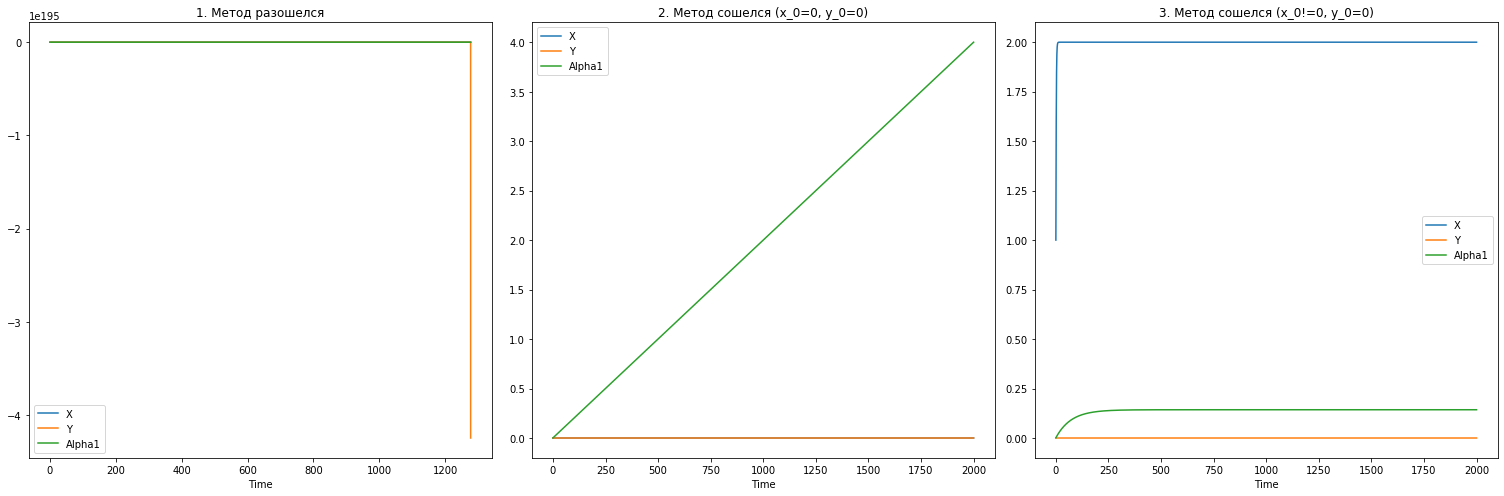

In [179]:
fig, ax = plt.subplots(1,3, figsize=(21,7), squeeze=False)
History['implicit'][1][2].plot(ax=ax[0][0], x='Time', title='1. Метод разошелся')
History['implicit'][1][0].plot(ax=ax[0][1], x='Time', title='2. Метод сошелся (x_0=0, y_0=0)')
History['implicit'][1][1].plot(ax=ax[0][2], x='Time', title='3. Метод сошелся (x_0!=0, y_0=0)')

fig.tight_layout()

__Вторая система__

In [62]:
%%time
History['implicit'][2], Results['implicit'][2] = testing_method(Runge_Kutta_implicit, second_odu_function,
                                                          second_x_grid, second_y_grid, alphas1=0.001, alphas2=10)

CPU times: user 1min 41s, sys: 341 ms, total: 1min 42s
Wall time: 1min 42s


In [63]:
Results['implicit'][2][Results['implicit'][2]['Сошелся']]

,x0,y0,alpha1_0,alpha2_0,alpha1_final,alpha2_final,Сошелся,Число успешных шагов
0,0,0,0.001,10,4.001,14,True,40000


In [74]:
print('Из {} попыток в итоге сошлись {}'.format(len(Results['implicit'][2]), np.count_nonzero(Results['implicit'][2]['Сошелся'])))

Из 25 попыток в итоге сошлись 1


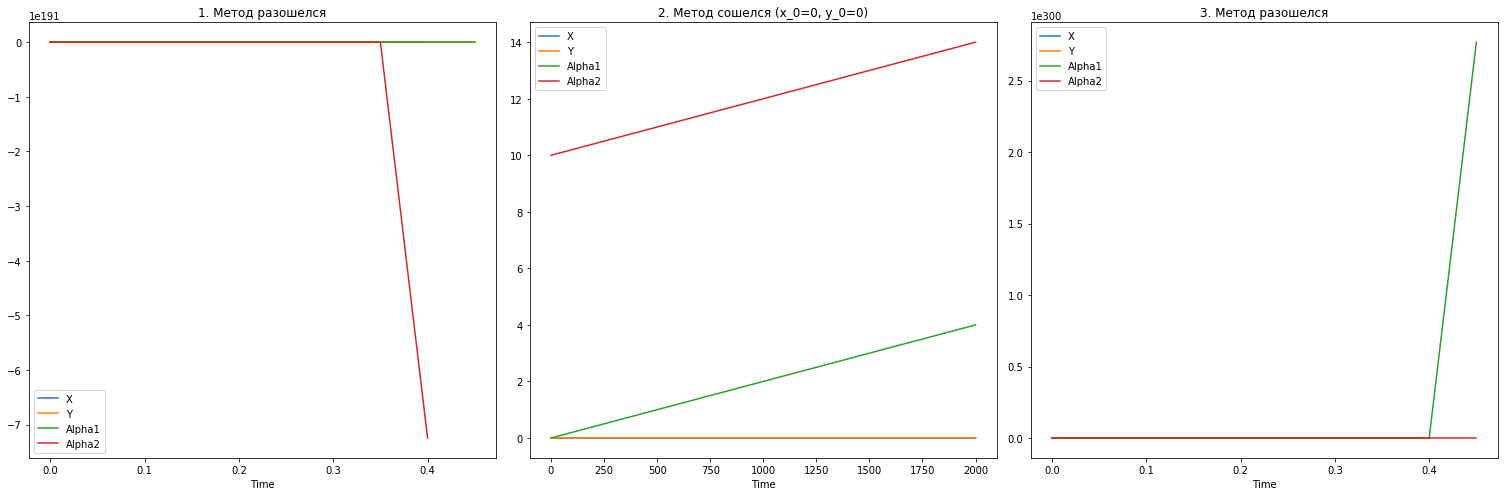

In [180]:
fig, ax = plt.subplots(1,3, figsize=(21,7), squeeze=False)
History['implicit'][2][2].plot(ax=ax[0][0], x='Time', title='1. Метод разошелся')
History['implicit'][2][0].plot(ax=ax[0][1], x='Time', title='2. Метод сошелся (x_0=0, y_0=0)')
History['implicit'][2][15].plot(ax=ax[0][2], x='Time', title='3. Метод разошелся')

fig.tight_layout()

__Третья система__

In [182]:
%%time
History['implicit'][3], Results['implicit'][3] = testing_method(Runge_Kutta_implicit, third_odu_function,
                                                          third_x_grid, third_y_grid, alphas1=0.001, alphas2=10)

CPU times: user 1min 55s, sys: 756 ms, total: 1min 56s
Wall time: 1min 57s


In [80]:
Results['implicit'][3][Results['implicit'][3]['Сошелся']]

,x0,y0,alpha1_0,alpha2_0,alpha1_final,alpha2_final,Сошелся,Число успешных шагов
0,0,0,0.001,10,0.401,10.4,True,40000


In [81]:
print('Из {} попыток в итоге сошлись {}'.format(len(Results['implicit'][3]), np.count_nonzero(Results['implicit'][3]['Сошелся'])))

Из 25 попыток в итоге сошлись 1


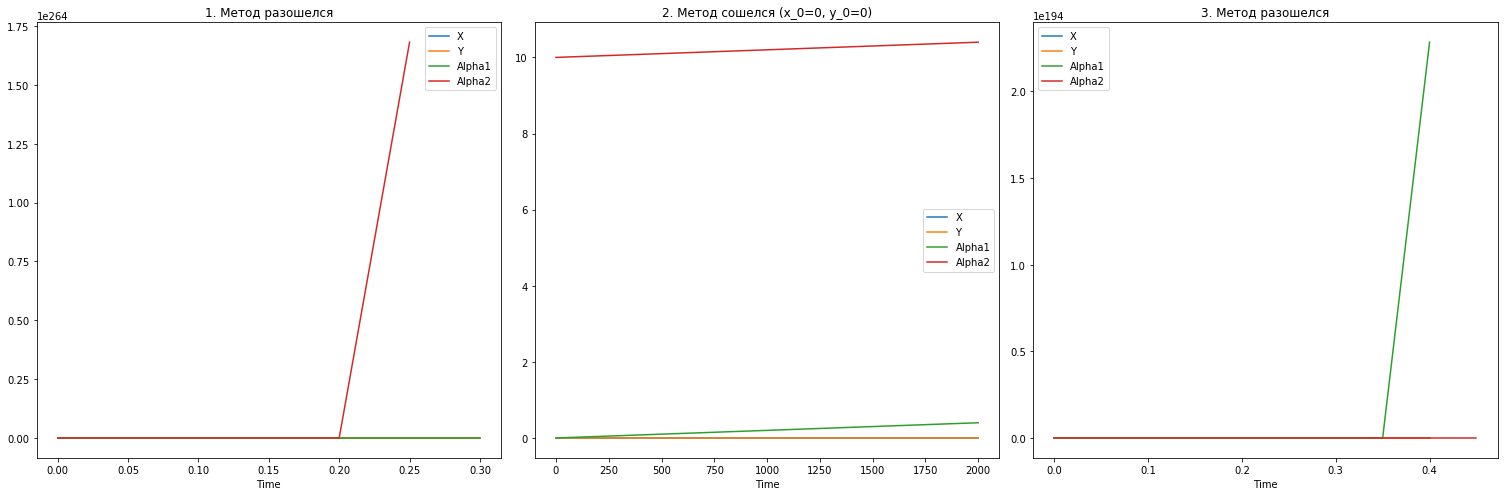

In [183]:
fig, ax = plt.subplots(1,3, figsize=(21,7), squeeze=False)
History['implicit'][3][2].plot(ax=ax[0][0], x='Time', title='1. Метод разошелся')
History['implicit'][3][0].plot(ax=ax[0][1], x='Time', title='2. Метод сошелся (x_0=0, y_0=0)')
History['implicit'][3][15].plot(ax=ax[0][2], x='Time', title='3. Метод разошелся')

fig.tight_layout()

В общем, видимо, либо я где-то облажался с неявным методом, либо этот вариант капитально не подходит нашей задаче.

## <a id=5> Попытка все исправить. Успех! </a>

Мда, что-то попытка самостоятельно реализовать неявный метод не увенчалась особым успехом. Попробуем воспользоваться библиотечной реализацией неявного метода ‘BDF’: _"Implicit multi-step variable-order (1 to 5) method based on a backward differentiation formula for the derivative approximation"_. В общем, явно какая-то крутая штука.

In [72]:
from scipy import integrate

__Первая система__

Прогоним этот солвер по тем же начальным значениями системы.

In [107]:
%%time
alpha1_0 = 0.001
BDF_history = {}
BDF_results = {}
BDF_history[1] = {}
BDF_results[1] = pd.DataFrame([],columns=['x0', 'y0','alpha1_0','alpha1_final','Сошелся'])
i=0
x_, y_ = np.meshgrid(first_x_grid, first_y_grid)
for initial in np.dstack([x_.ravel(),y_.ravel()])[0]:
    res = integrate.solve_ivp(first_odu_function, (0, 2000), np.append(initial, alpha1_0), method='BDF', max_step=0.1)
    BDF_history[1][i] = {'initial':initial, 'res':res}
    BDF_results[1].loc[i] = np.append(initial, [0.001, res.y[2][-1], res.success])
    i+=1

CPU times: user 57.7 s, sys: 31.2 ms, total: 57.8 s
Wall time: 57.7 s


In [108]:
BDF_results[1]

,x0,y0,alpha1_0,alpha1_final,Сошелся
0,0.0,0.0,0.001,4.001000,1.0
1,1.0,0.0,0.001,0.142857,1.0
2,0.0,2.0,0.001,4.001000,1.0
3,1.0,2.0,0.001,256.465521,1.0
4,0.0,4.0,0.001,4.001000,1.0
5,1.0,4.0,0.001,253.661236,1.0
6,0.0,6.0,0.001,4.001000,1.0
7,1.0,6.0,0.001,1.541514,1.0
8,0.0,8.0,0.001,4.001000,1.0
9,1.0,8.0,0.001,256.886907,1.0


О чудо, сошлись все, да еще и за минуту...

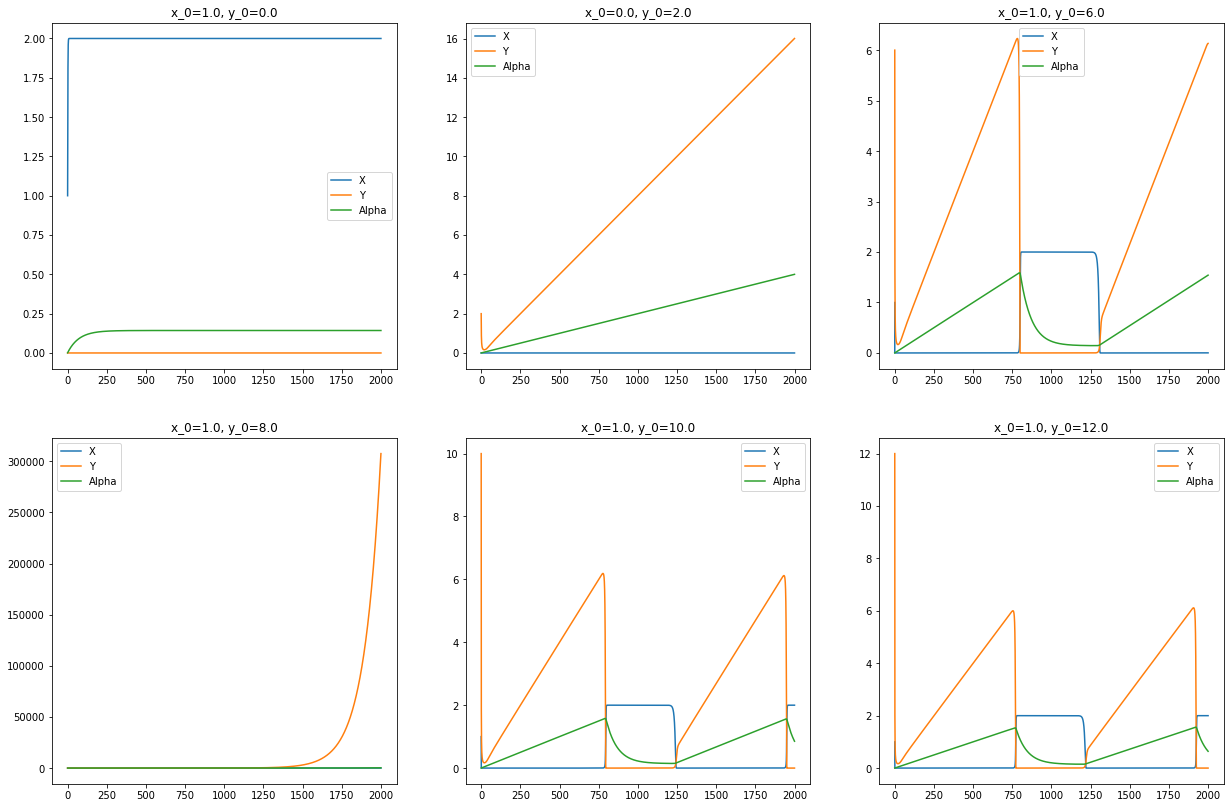

In [131]:
fig, ax = plt.subplots(2,3, figsize=(21,14), squeeze=False)
for i,ind in enumerate([1,2,7,9,11,13]):
    pl = ax[i//3,i%3].plot(BDF_history[1][ind]['res'].t, BDF_history[1][ind]['res'].y.T)
    ax[i//3,i%3].set_title('x_0={}, y_0={}'.format(*BDF_results[1].loc[ind,'x0':'y0']))
    ax[i//3,i%3].legend(pl, ['X','Y','Alpha'], loc='best')

Вот это я понимаю графики! Напомню, наши явные Рунге-Кутты смогли получить лишь первые два случая. С остальными случаями они попросту не справились, а тут ведь происходили такие чудеса! Самая красата происходит на графиках с ненулевыми начальными значениями x и y, на которые до этого у нас не было возможности взглянуть.

Перейдем ко __второй системе__

In [134]:
%%time
alpha1_0 = 0.001
alpha2_0 = 10
BDF_history[2] = {}
BDF_results[2] = pd.DataFrame([],columns=['x0', 'y0','alpha1_0','alpha2_0','alpha1_final','alpha2_final','Сошелся'])
i=0
x_, y_ = np.meshgrid(second_x_grid, second_y_grid)
for initial in np.dstack([x_.ravel(),y_.ravel()])[0]:
    res = integrate.solve_ivp(second_odu_function, (0, 2000), np.append(initial, [alpha1_0,alpha2_0]), method='BDF', max_step=0.1)
    BDF_history[2][i] = {'initial':initial, 'res':res}
    BDF_results[2].loc[i] = np.append(initial, [0.001, 10, res.y[2][-1], res.y[3][-1], res.success])
    i+=1

CPU times: user 35.3 s, sys: 20.7 ms, total: 35.3 s
Wall time: 35.3 s


Вот это скорость...

In [135]:
BDF_results[2]

,x0,y0,alpha1_0,alpha2_0,alpha1_final,alpha2_final,Сошелся
0,0.0,0.0,0.001,10.0,4.001000,8.017775e-01,1.0
1,10.0,0.0,0.001,10.0,4.001000,8.002667e-01,1.0
2,20.0,0.0,0.001,10.0,4.001000,8.002667e-01,1.0
3,30.0,0.0,0.001,10.0,4.001000,8.002667e-01,1.0
4,40.0,0.0,0.001,10.0,4.001000,8.002667e-01,1.0
5,0.0,10.0,0.001,10.0,0.301565,3.518807e+01,0.0
6,10.0,10.0,0.001,10.0,0.001002,1.275609e-07,0.0
7,20.0,10.0,0.001,10.0,0.001001,4.204069e-07,0.0
8,30.0,10.0,0.001,10.0,0.001001,3.631263e-07,0.0
9,40.0,10.0,0.001,10.0,0.001000,3.217584e-07,0.0


В этот раз сошлись уже не все)

In [137]:
print('Из {} попыток в итоге сошлись {}'.format(len(BDF_results[2]), int(np.sum(BDF_results[2]['Сошелся']))))

Из 25 попыток в итоге сошлись 9


Однако, в случае с нашим Рунге-Кутты 4го порядка сошлись лишь 5.

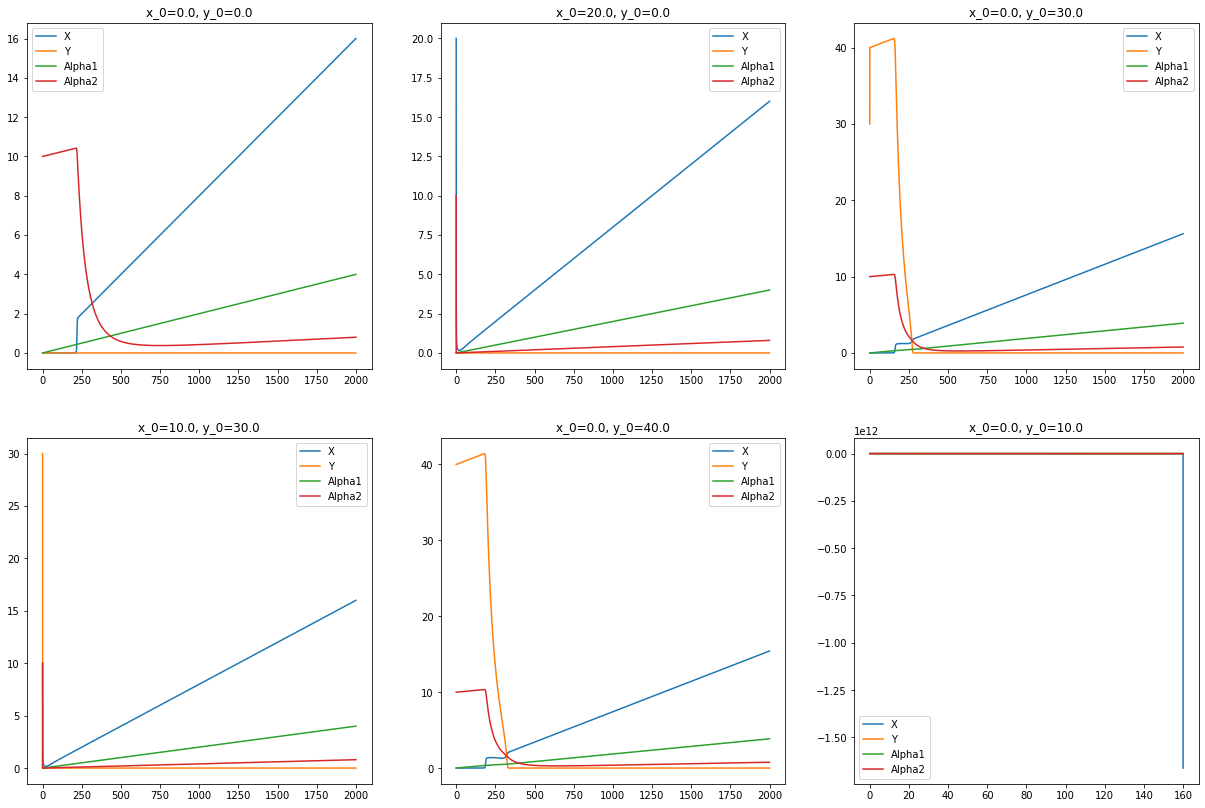

In [141]:
fig, ax = plt.subplots(2,3, figsize=(21,14), squeeze=False)
for i,ind in enumerate([0,2,15,16,20,5]):
    pl = ax[i//3,i%3].plot(BDF_history[2][ind]['res'].t, BDF_history[2][ind]['res'].y.T)
    ax[i//3,i%3].set_title('x_0={}, y_0={}'.format(*BDF_results[2].loc[ind,'x0':'y0']))
    ax[i//3,i%3].legend(pl, ['X','Y','Alpha1', 'Alpha2'], loc='best')

На последнем графике случай когда метод разошелся. Как круто все это выглядит!

__Третья система__

In [142]:
%%time
alpha1_0 = 0.001
alpha2_0 = 10
BDF_history[3] = {}
BDF_results[3] = pd.DataFrame([],columns=['x0', 'y0','alpha1_0','alpha2_0','alpha1_final','alpha2_final','Сошелся'])
i=0
x_, y_ = np.meshgrid(third_x_grid, third_y_grid)
for initial in np.dstack([x_.ravel(),y_.ravel()])[0]:
    res = integrate.solve_ivp(third_odu_function, (0, 2000), np.append(initial, [alpha1_0,alpha2_0]), method='BDF', max_step=0.1)
    BDF_history[3][i] = {'initial':initial, 'res':res}
    BDF_results[3].loc[i] = np.append(initial, [0.001, 10, res.y[2][-1], res.y[3][-1], res.success])
    i+=1

CPU times: user 1min 25s, sys: 173 ms, total: 1min 25s
Wall time: 1min 25s


In [143]:
BDF_results[3]

,x0,y0,alpha1_0,alpha2_0,alpha1_final,alpha2_final,Сошелся
0,0.0,0.0,0.001,10.0,0.401000,0.135729,1.0
1,10.0,0.0,0.001,10.0,0.401000,0.133722,1.0
2,20.0,0.0,0.001,10.0,0.401000,0.133722,1.0
3,30.0,0.0,0.001,10.0,0.401000,0.133722,1.0
4,40.0,0.0,0.001,10.0,0.401000,0.133722,1.0
5,0.0,10.0,0.001,10.0,0.400975,0.134082,1.0
6,10.0,10.0,0.001,10.0,0.400996,0.133721,1.0
7,20.0,10.0,0.001,10.0,0.401015,0.133727,1.0
8,30.0,10.0,0.001,10.0,0.401009,0.133725,1.0
9,40.0,10.0,0.001,10.0,0.001045,0.000007,0.0


Сошлись практически все)

In [144]:
print('Из {} попыток в итоге сошлись {}'.format(len(BDF_results[3]), int(np.sum(BDF_results[3]['Сошелся']))))

Из 25 попыток в итоге сошлись 20


В случае с нашим Рунге-Кутты 4го порядка сошлись всего лишь 5.

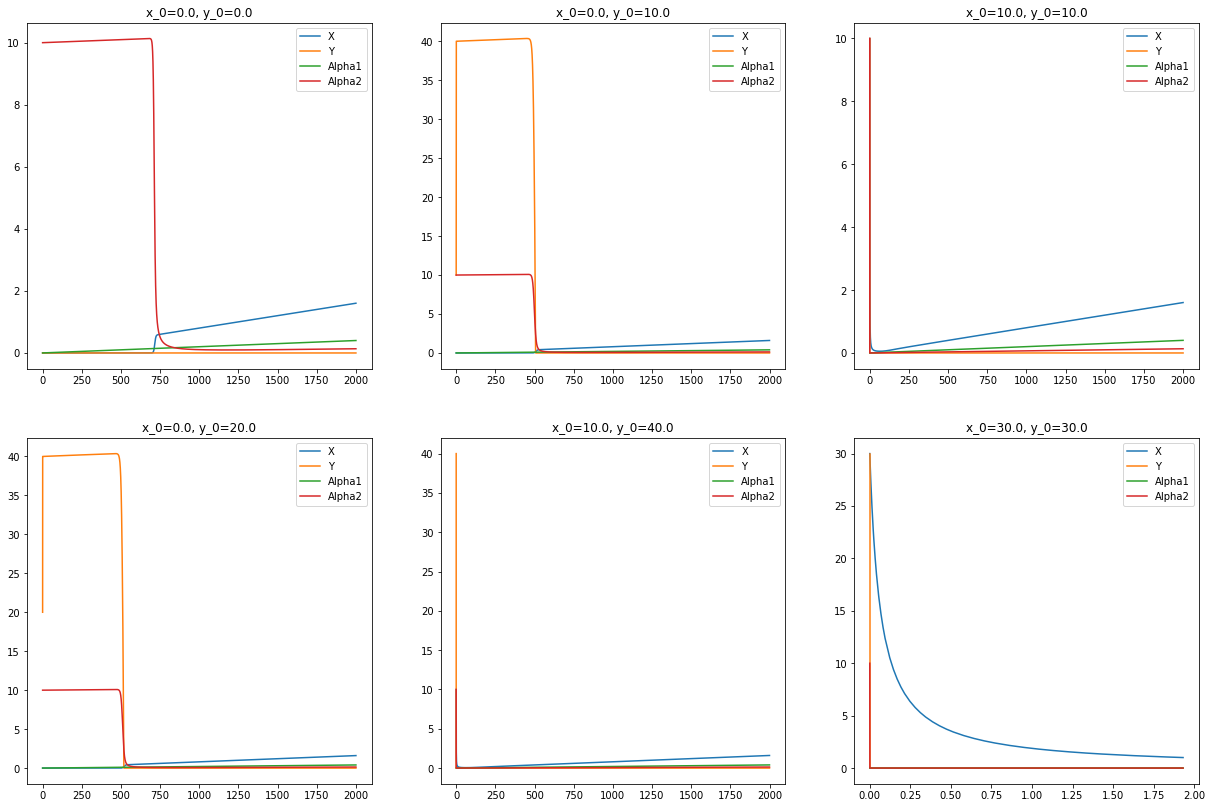

In [159]:
fig, ax = plt.subplots(2,3, figsize=(21,14), squeeze=False)
for i,ind in enumerate([0, 5, 6, 10, 21, 18]):
    pl = ax[i//3,i%3].plot(BDF_history[3][ind]['res'].t, BDF_history[3][ind]['res'].y.T)
    ax[i//3,i%3].set_title('x_0={}, y_0={}'.format(*BDF_results[3].loc[ind,'x0':'y0']))
    ax[i//3,i%3].legend(pl, ['X','Y','Alpha1', 'Alpha2'], loc='best')

Где-то поведение метода имеет линейный характер, где-то графики довольно причудливы. Последний график - когда метод разошелся.

## <a id=6> Заключение </a>

Ну чтож, работа лично для меня выдалась непростой. Пробежимся по тому, что мы в ней рассмотрели:

1) Простенький явный метод Рунге-Кутты первого порядка, который смог справиться с некоторыми начальными значениями и вполне даже вроде бы нормально;

2) Более интересный явный метод Рунге-Кутты четвертого порядка, который справляется со своей задачей немного лучше первого;

3) Далее мы столкнулись с тем, что предложенный на просторах Интернета неявный двушаговый метод отказывается решать наши системы совсем;

4) Реабилитировались, воспользовавшись стандартным неявным методом, который сошелся практически на всех данных ему начальных условиях и установил разнообразные интересные случая поведения наших переменных в зависимости от начальных данных задачи.

Спасибо за внимание!